In [ ]:
import sklearn
from sklearn.cluster import KMeans
from keras.datasets import mnist
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statistics
from sklearn import datasets
from sklearn.datasets import make_blobs

# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)
n = 1000
x = x[:n]
y = y[:n]
# 10 clusters
print(np.shape(x))
k = 10
p = len(x[0])
PCA_x = PCA(n_components=10).fit_transform(x)

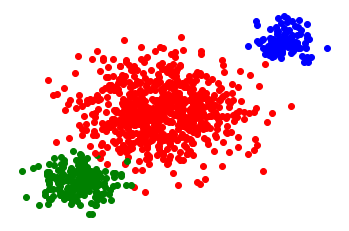

In [ ]:
indices = [i for i in range(1000)]

toy0, toy0_labels_true = make_blobs(n_samples=[700,200,100], centers=[[0, 1.5], [-3, -2.5], [4.5, 5.5]], cluster_std=[1.5,0.7,0.6], random_state=0)
for i in indices:
    if toy0_labels_true[i] == 0:
        plt.plot(toy0[i, 0],toy0[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy0_labels_true[i] == 1:
        plt.plot(toy0[i, 0],toy0[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy0_labels_true[i] == 2:
        plt.plot(toy0[i, 0],toy0[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
plt.axis('off')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy0.png")
plt.show()

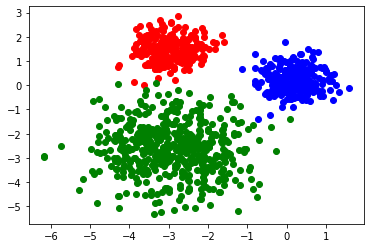

accuracy is 0.259


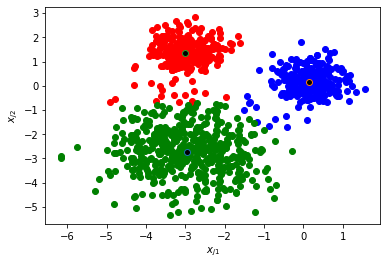

In [ ]:
toy03, toy03_labels_true = make_blobs(n_samples=[250,500,250], centers=[[-3, 1.5], [-3, -2.5], [0.2, 0.2]], cluster_std=[0.5,1,0.5], random_state=127)
for i in indices:
    if toy03_labels_true[i] == 0:
        plt.plot(toy03[i, 0],toy03[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy03_labels_true[i] == 1:
        plt.plot(toy03[i, 0],toy03[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy03_labels_true[i] == 2:
        plt.plot(toy03[i, 0],toy03[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
#plt.axis('off')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
#plt.savefig(f"{images_dir}/toy03.png")
plt.show()

toy03kmeans = KMeans(n_clusters=3, random_state=0).fit(toy03)
toy03kmeanspredicted = toy03kmeans.labels_

c = 0
for i in indices:
    if toy03kmeanspredicted[i] == 0 and toy03_labels_true[i] == 2:
        c += 1
    if toy03kmeanspredicted[i] == 1 and toy03_labels_true[i] == 1:
        c += 1
    if toy03kmeanspredicted[i] == 2 and toy03_labels_true[i] == 0:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy03kmeanspredicted[i] == 0:
        plt.plot(toy03[i, 0],toy03[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy03kmeanspredicted[i] == 1:
        plt.plot(toy03[i, 0],toy03[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy03kmeanspredicted[i] == 2:
        plt.plot(toy03[i, 0],toy03[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
centroids = toy03kmeans.cluster_centers_
for i in range(3):
  plt.plot(centroids[i][0],centroids[i][1],'o', markerfacecolor='black')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
#plt.title('K-means clustering of toy 03')
plt.savefig(f"{images_dir}/toy03.png")
plt.show()

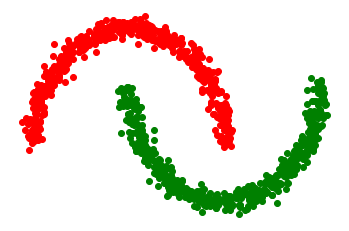

In [ ]:
indices = [i for i in range(1000)]

toy01, toy01_labels_true = datasets.make_moons(n_samples=1000, noise=.05)
for i in indices:
    if toy01_labels_true[i] == 0:
        plt.plot(toy01[i, 0],toy01[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy01_labels_true[i] == 1:
        plt.plot(toy01[i, 0],toy01[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
plt.axis('off')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy01.png")
plt.show()

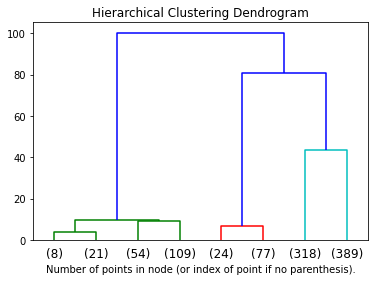

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(toy0)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig(f"{images_dir}/toy02.png")
plt.show()

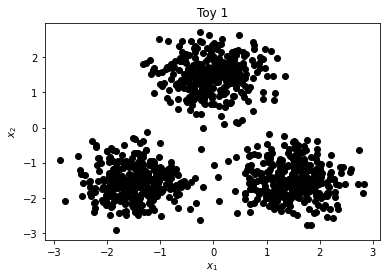

In [ ]:
for i in range(1000):
  plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
plt.title('Toy 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy1.png")
plt.show()

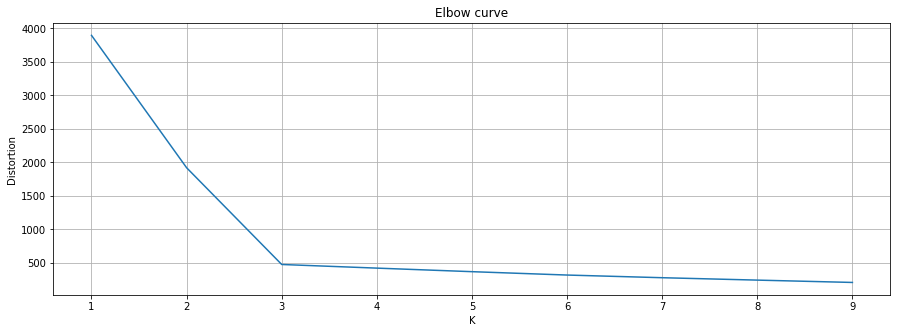

In [ ]:
from sklearn.datasets import load_boston

(irisx, irisy) = load_boston(return_X_y=True)

distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(toy1)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid(True)
plt.title('Elbow curve')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy1elbow.png")
plt.show()

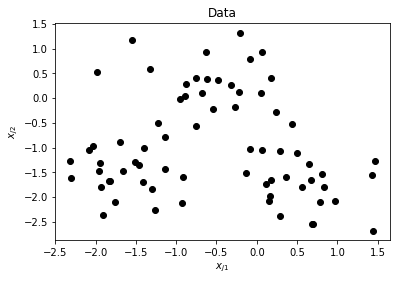

In [ ]:
toykmeans, toykmeans_labels_true = make_blobs(n_samples=70, centers=[[-0.7, 0.2], [-1.5, -1.5], [0.5, -2]], cluster_std=[0.5,0.5,0.5], random_state=0)
for i in range(70):
    plt.plot(toykmeans[i, 0],toykmeans[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
    
plt.title('Data')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toykmeansdata.png")
plt.show()

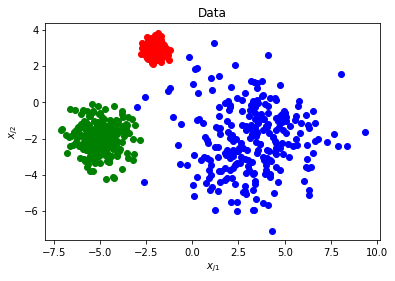

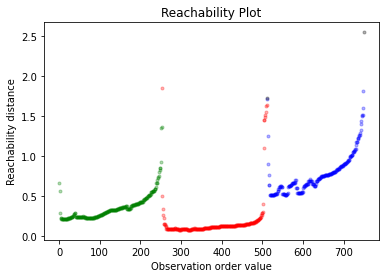

In [ ]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C3 = [3, -2] + 2 * np.random.randn(n_points_per_cluster, 2)
toy04 = np.vstack((C1, C2, C3))


for i in range(250):
  plt.plot(toy04[i, 0],toy04[i, 1],'o',color='g')
for i in range(250,500):
  plt.plot(toy04[i, 0],toy04[i, 1],'o',color='r')
for i in range(500,750):
  plt.plot(toy04[i, 0],toy04[i, 1],'o',color='b')

plt.title('Data')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy04.png")
plt.show()


clust = OPTICS(min_samples=14, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(toy04)

space = np.arange(len(toy04))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

# Reachability plot
colors = ['g.', 'r.', 'b.']
for klass, color in zip(range(0, 3), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
#plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability distance')
plt.xlabel('Observation order value')
plt.title('Reachability Plot')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
#plt.savefig(f"{images_dir}/toy04reachplot2.png")

plt.show()



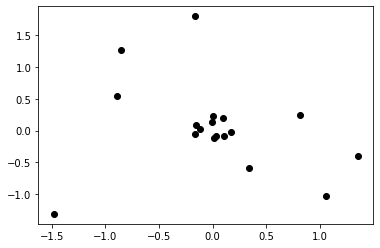

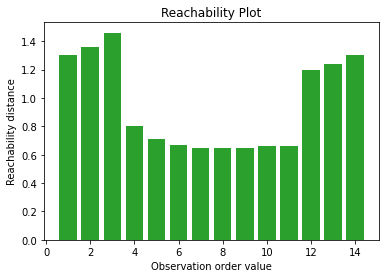

In [ ]:
toy05, toy05_labels_true = make_blobs(n_samples=[12,8], centers=[[0, 0],[0,0]], cluster_std=[1,0.1])
for i in range(18):
  plt.plot(toy05[i, 0],toy05[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
plt.show()

toy05clust = OPTICS(min_samples=14, xi=.05, min_cluster_size=.05)

# Run the fit
toy05clust.fit(toy05)

space = np.arange(len(toy05))
reachability = toy05clust.reachability_[toy05clust.ordering_]
labels = toy05clust.labels_[toy05clust.ordering_]

# Reachability plot
colors = ['g.', 'r.', 'b.']
for klass in zip(range(0, 3)):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.bar(np.arange(14)+1, [1.3,1.36,1.46,0.8,0.71,0.67,0.65,0.65,0.65,0.66,0.66,1.2,1.24,1.3])
'''
for i in range(20):
  plt.bar(toy05clust.ordering_,reachability)
'''
plt.ylabel('Reachability distance')
plt.xlabel('Observation order value')
plt.title('Reachability Plot')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toyreachplot.png")

plt.show()



In [ ]:
from scipy.special import comb
from itertools import combinations

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

def rand_index_score(clusters, classes):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

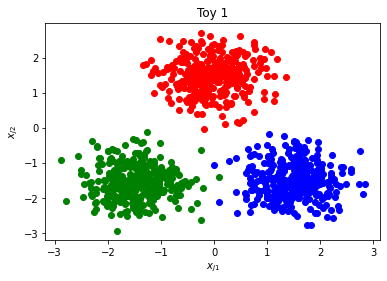

In [ ]:

indices = [i for i in range(1000)]

toy1, toy1_labels_true = make_blobs(n_samples=1000, centers=[[0, 1.5], [-1.5, -1.5], [1.5, -1.5]], cluster_std=[0.5,0.5,0.5], random_state=0)
for i in indices:
    if toy1_labels_true[i] == 0:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy1_labels_true[i] == 1:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy1_labels_true[i] == 2:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
plt.title('Toy 1')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy1.png")
plt.show()

accuracy is 0.999


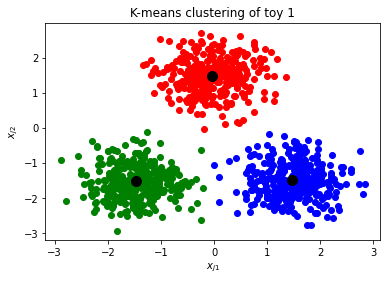

In [ ]:
toy1kmeans = KMeans(n_clusters=3, random_state=0).fit(toy1)
toy1kmeanspredicted = toy1kmeans.labels_

c = 0
for i in indices:
    if toy1kmeanspredicted[i] == 0 and toy1_labels_true[i] == 2:
        c += 1
    if toy1kmeanspredicted[i] == 1 and toy1_labels_true[i] == 1:
        c += 1
    if toy1kmeanspredicted[i] == 2 and toy1_labels_true[i] == 0:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy1kmeanspredicted[i] == 0:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy1kmeanspredicted[i] == 1:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy1kmeanspredicted[i] == 2:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='r',markeredgecolor='r')

for i in range(len(toy1kmeans.cluster_centers_)):
  plt.plot(toy1kmeans.cluster_centers_[i][0],toy1kmeans.cluster_centers_[i][1], 'o',color='black',markersize=10)

plt.title('K-means clustering of toy 1')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeanstoy1.png")
plt.show()

for i in range(len(toy1kmeanspredicted)):
  if toy1kmeanspredicted[i] == 0:
    toy1kmeanspredicted[i] = 2
  elif toy1kmeanspredicted[i] == 1:
    toy1kmeanspredicted[i] = 1
  elif toy1kmeanspredicted[i] == 2:
    toy1kmeanspredicted[i] = 0

In [ ]:
print(sklearn.metrics.silhouette_score(toy1,toy1kmeanspredicted))
print(sklearn.metrics.davies_bouldin_score(toy1,toy1kmeanspredicted))

print(purity_score(toy1_labels_true, toy1kmeanspredicted))
print(rand_index_score(toy1_labels_true.astype(np.int64),toy1kmeanspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy1_labels_true, toy1kmeanspredicted, average='weighted'))

0.704854930741387
0.39922793590418443
0.999
0.9986686686686687
0.9989999977454882


[-1  0  1  2]
accuracy is 0.997


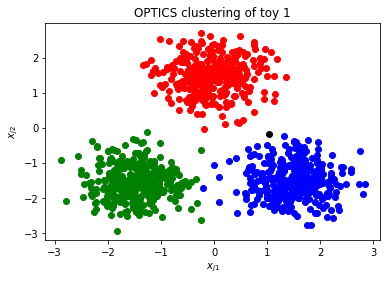

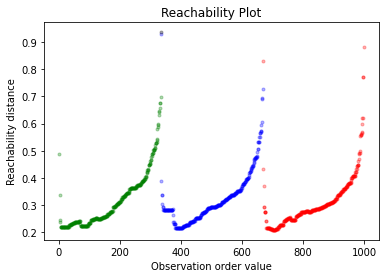

In [ ]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
toy1optics = OPTICS(min_samples=28,metric='manhattan').fit(toy1)
toy1opticspredicted = toy1optics.labels_
print(np.unique(toy1optics.labels_))

c = 0
for i in indices:
    if toy1opticspredicted[i] == 0 and toy1_labels_true[i] == 0:
        c += 1
    if toy1opticspredicted[i] == 1 and toy1_labels_true[i] == 2:
        c += 1
    if toy1opticspredicted[i] == 2 and toy1_labels_true[i] == 1:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy1opticspredicted[i] == 0:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy1opticspredicted[i] == 1:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy1opticspredicted[i] == 2:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy1opticspredicted[i] == -1:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
plt.title('OPTICS clustering of toy 1')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/opticstoy1.png")
plt.show()

for i in range(len(toy1opticspredicted)):
  if toy1opticspredicted[i] == 1:
    toy1opticspredicted[i] = 2
  elif toy1opticspredicted[i] == 2:
    toy1opticspredicted[i] = 1

nooutlierstoy1 = []
nooutlierstoy1predicted = []
for i in range(len(toy1opticspredicted)):
  if toy1opticspredicted[i] != -1:
    nooutlierstoy1predicted.append(toy1opticspredicted[i])
    nooutlierstoy1.append(toy1[i])

toy1space = np.arange(len(toy1))
toy1reachability = toy1optics.reachability_[toy1optics.ordering_]
toy1labels = toy1optics.labels_[toy1optics.ordering_]

# Reachability plot
colors = ['g.', 'r.', 'b.']
for klass, color in zip(range(0, 3), colors):
    Xk = toy1space[toy1labels == klass]
    Rk = toy1reachability[toy1labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(toy1space[toy1labels == -1], toy1reachability[toy1labels == -1], 'k.', alpha=0.3)
#plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability distance')
plt.xlabel('Observation order value')
plt.title('Reachability Plot')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy1reachplot.png")

plt.show()

In [ ]:
print(sklearn.metrics.silhouette_score(nooutlierstoy1,nooutlierstoy1predicted))
print(sklearn.metrics.davies_bouldin_score(nooutlierstoy1,nooutlierstoy1predicted))

print(purity_score(toy1_labels_true, toy1opticspredicted))
for i in range(len(toy1opticspredicted)):
  if toy1opticspredicted[i] == -1:
    toy1opticspredicted[i] = 3
print(rand_index_score(toy1_labels_true.astype(np.int64),toy1opticspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy1_labels_true, toy1opticspredicted, average='weighted'))

0.7049384014200825
0.39899990605844954
0.998
0.9966806806806807
0.9974992368273695


accuracy is 0.999
[[ 0.23666189 -0.00955433]
 [-0.00955433  0.24592181]]
[[ 0.2297411  -0.00281751]
 [-0.00281751  0.23015822]]
[[0.24349231 0.00215085]
 [0.00215085 0.24619159]]


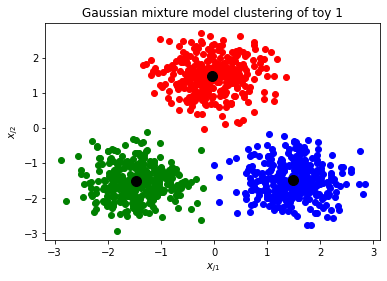

In [ ]:
from sklearn.mixture import GaussianMixture
toy1gmm = GaussianMixture(n_components=3, random_state=0).fit(toy1)
toy1gmmmeans = toy1gmm
toy1gmmpredicted = toy1gmm.predict(toy1)

c = 0
for i in indices:
    if toy1gmmpredicted[i] == 0 and toy1_labels_true[i] == 2:
        c += 1
    if toy1gmmpredicted[i] == 1 and toy1_labels_true[i] == 1:
        c += 1
    if toy1gmmpredicted[i] == 2 and toy1_labels_true[i] == 0:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy1gmmpredicted[i] == 0:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy1gmmpredicted[i] == 1:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy1gmmpredicted[i] == 2:
        plt.plot(toy1[i, 0],toy1[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
for i in range(len(toy1gmm.means_)):
  plt.plot(toy1gmm.means_[i][0],toy1gmm.means_[i][1], 'o',color='black',markersize=10)
  print(toy1gmm.covariances_[i])
plt.title('Gaussian mixture model clustering of toy 1')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/gmmtoy1.png")
plt.show()

for i in range(len(toy1gmmpredicted)):
  if toy1gmmpredicted[i] == 0:
    toy1gmmpredicted[i] = 2
  elif toy1gmmpredicted[i] == 1:
    toy1gmmpredicted[i] = 1
  elif toy1gmmpredicted[i] == 2:
    toy1gmmpredicted[i] = 0

In [ ]:
print(sklearn.metrics.silhouette_score(toy1,toy1gmmpredicted))
print(sklearn.metrics.davies_bouldin_score(toy1,toy1gmmpredicted))

print(purity_score(toy1_labels_true, toy1gmmpredicted))
print(rand_index_score(toy1_labels_true.astype(np.int64),toy1gmmpredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy1_labels_true, toy1gmmpredicted, average='weighted'))

0.704854930741387
0.39922793590418443
0.999
0.9986686686686687
0.9989999977454882


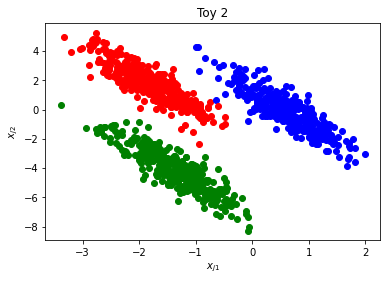

In [ ]:
toy2, toy2_labels_true = datasets.make_blobs(n_samples=1000, random_state=170)
transformation = [[0.4, -0.4], [-0.4, 1.4]]
toy2 = np.dot(toy2, transformation)
for i in indices:
    if toy2_labels_true[i] == 0:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy2_labels_true[i] == 1:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy2_labels_true[i] == 2:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
plt.title('Toy 2')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy2.png")
plt.show()

accuracy is 0.882


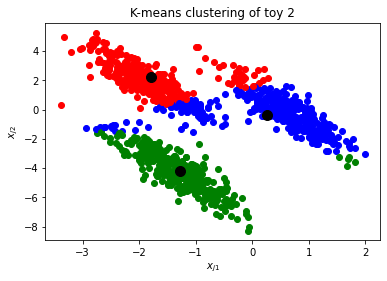

In [ ]:
from sklearn.cluster import KMeans
toy2kmeans = KMeans(n_clusters=3, random_state=0).fit(toy2)
toy2kmeanspredicted = toy2kmeans.labels_

c = 0
for i in indices:
    if toy2kmeanspredicted[i] == 0 and toy2_labels_true[i] == 2:
        c += 1
    if toy2kmeanspredicted[i] == 1 and toy2_labels_true[i] == 0:
        c += 1
    if toy2kmeanspredicted[i] == 2 and toy2_labels_true[i] == 1:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy2kmeanspredicted[i] == 0:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy2kmeanspredicted[i] == 1:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy2kmeanspredicted[i] == 2:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
for i in range(len(toy2kmeans.cluster_centers_)):
  plt.plot(toy2kmeans.cluster_centers_[i][0],toy2kmeans.cluster_centers_[i][1], 'o',color='black',markersize=10)
plt.title('K-means clustering of toy 2')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeanstoy2.png")
plt.show()

for i in range(len(toy2kmeanspredicted)):
  if toy2kmeanspredicted[i] == 0:
    toy2kmeanspredicted[i] = 2
  elif toy2kmeanspredicted[i] == 1:
    toy2kmeanspredicted[i] = 0
  elif toy2kmeanspredicted[i] == 2:
    toy2kmeanspredicted[i] = 1

In [ ]:
print(sklearn.metrics.silhouette_score(toy2,toy2kmeanspredicted))
print(sklearn.metrics.davies_bouldin_score(toy2,toy2kmeanspredicted))

print(purity_score(toy2_labels_true, toy2kmeanspredicted))
print(rand_index_score(toy2_labels_true.astype(np.int64),toy2kmeanspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy2_labels_true, toy2kmeanspredicted, average='weighted'))

0.5236015621283772
0.6570364469183182
0.882
0.862034034034034
0.8828902414544072


[-1  0  1  2]
accuracy is 0.963


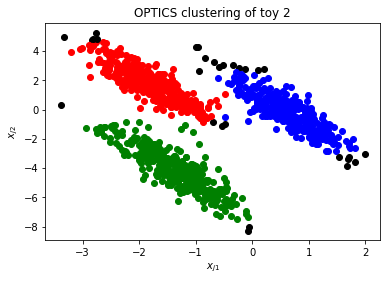

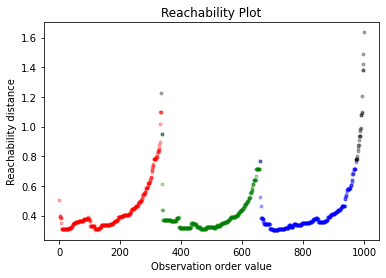

In [ ]:
toy2optics = OPTICS(min_samples=27,metric='manhattan').fit(toy2)
toy2opticspredicted = toy2optics.labels_
print(np.unique(toy2optics.labels_))

c = 0
for i in indices:
    if toy2opticspredicted[i] == 0 and toy2_labels_true[i] == 0:
        c += 1
    if toy2opticspredicted[i] == 1 and toy2_labels_true[i] == 1:
        c += 1
    if toy2opticspredicted[i] == 2 and toy2_labels_true[i] == 2:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy2opticspredicted[i] == 0:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy2opticspredicted[i] == 1:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy2opticspredicted[i] == 2:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy2opticspredicted[i] == -1:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
plt.title('OPTICS clustering of toy 2')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/opticstoy2.png")
plt.show()

nooutlierstoy2 = []
nooutlierstoy2predicted = []
for i in range(len(toy2opticspredicted)):
  if toy2opticspredicted[i] != -1:
    nooutlierstoy2predicted.append(toy2opticspredicted[i])
    nooutlierstoy2.append(toy2[i])

toy2space = np.arange(len(toy2))
toy2reachability = toy2optics.reachability_[toy2optics.ordering_]
toy2labels = toy2optics.labels_[toy2optics.ordering_]

# Reachability plot
colors = ['r.', 'g.', 'b.']
for klass, color in zip(range(0, 3), colors):
    Xk = toy2space[toy2labels == klass]
    Rk = toy2reachability[toy2labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(toy2space[toy2labels == -1], toy2reachability[toy2labels == -1], 'k.', alpha=0.3)
#plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability distance')
plt.xlabel('Observation order value')
plt.title('Reachability Plot')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy2reachplot.png")

plt.show()

In [ ]:
print(sklearn.metrics.silhouette_score(nooutlierstoy2,nooutlierstoy2predicted))
print(sklearn.metrics.davies_bouldin_score(nooutlierstoy2,nooutlierstoy2predicted))
for i in range(len(toy2opticspredicted)):
  if toy2opticspredicted[i] == -1:
    toy2opticspredicted[i] = 3
print(purity_score(toy2_labels_true, toy2opticspredicted))
print(rand_index_score(toy2_labels_true.astype(np.int64),toy2opticspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy2_labels_true, toy2opticspredicted, average='weighted'))

0.5294163638170136
0.640469869730712
0.981
0.9713273273273273
0.9775500964849705


accuracy is 0.999
[[ 0.33294247 -0.73695632]
 [-0.73695632  2.12774831]]
[[ 0.29611609 -0.6140953 ]
 [-0.6140953   1.71759505]]
[[ 0.29520595 -0.66205194]
 [-0.66205194  1.9388335 ]]


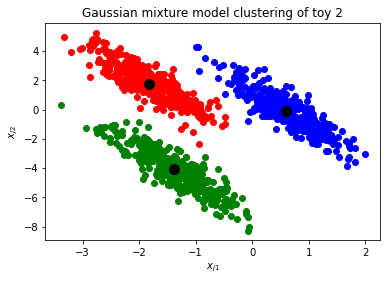

In [ ]:
toy2gmm = GaussianMixture(n_components=3, random_state=0).fit(toy2)
toy2gmmmeans = toy2gmm
toy2gmmpredicted = toy2gmm.predict(toy2)

c = 0
for i in indices:
    if toy2gmmpredicted[i] == 0 and toy2_labels_true[i] == 0:
        c += 1
    if toy2gmmpredicted[i] == 1 and toy2_labels_true[i] == 1:
        c += 1
    if toy2gmmpredicted[i] == 2 and toy2_labels_true[i] == 2:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy2gmmpredicted[i] == 0:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy2gmmpredicted[i] == 1:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy2gmmpredicted[i] == 2:
        plt.plot(toy2[i, 0],toy2[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
for i in range(len(toy2gmm.means_)):
  plt.plot(toy2gmm.means_[i][0],toy2gmm.means_[i][1], 'o',color='black',markersize=10)
  print(toy2gmm.covariances_[i])
plt.title('Gaussian mixture model clustering of toy 2')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/gmmtoy2.png")
plt.show()


In [ ]:
print(sklearn.metrics.silhouette_score(toy2,toy2gmmpredicted))
print(sklearn.metrics.davies_bouldin_score(toy2,toy2gmmpredicted))

print(purity_score(toy2_labels_true, toy2gmmpredicted))
print(rand_index_score(toy2_labels_true.astype(np.int64),toy2gmmpredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy2_labels_true, toy2gmmpredicted, average='weighted'))

0.49714702754961126
0.7070729231937031
0.999
0.9986686686686687
0.9989999977454882


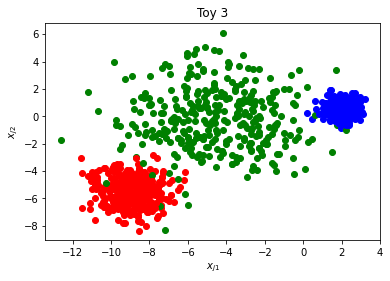

In [ ]:
toy3, toy3_labels_true = varied = datasets.make_blobs(n_samples=1000,cluster_std=[1.0, 2.5, 0.5],random_state=170)

for i in indices:
    if toy3_labels_true[i] == 0:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy3_labels_true[i] == 1:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy3_labels_true[i] == 2:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
plt.title('Toy 3')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy3.png")
plt.show()

accuracy is 0.941


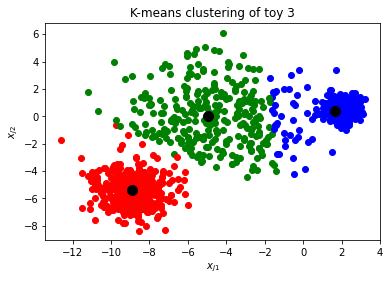

In [ ]:
toy3kmeans = KMeans(n_clusters=3, random_state=0).fit(toy3)
toy3kmeanspredicted = toy3kmeans.labels_

c = 0
for i in indices:
    if toy3kmeanspredicted[i] == 0 and toy3_labels_true[i] == 1:
        c += 1
    if toy3kmeanspredicted[i] == 1 and toy3_labels_true[i] == 2:
        c += 1
    if toy3kmeanspredicted[i] == 2 and toy3_labels_true[i] == 0:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy3kmeanspredicted[i] == 0:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy3kmeanspredicted[i] == 1:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy3kmeanspredicted[i] == 2:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
for i in range(len(toy3kmeans.cluster_centers_)):
  plt.plot(toy3kmeans.cluster_centers_[i][0],toy3kmeans.cluster_centers_[i][1], 'o',color='black',markersize=10)
plt.title('K-means clustering of toy 3')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeanstoy3.png")
plt.show()

for i in range(len(toy3kmeanspredicted)):
  if toy3kmeanspredicted[i] == 0:
    toy3kmeanspredicted[i] = 1
  elif toy3kmeanspredicted[i] == 1:
    toy3kmeanspredicted[i] = 2
  elif toy3kmeanspredicted[i] == 2:
    toy3kmeanspredicted[i] = 0

In [ ]:
print(sklearn.metrics.silhouette_score(toy3,toy3kmeanspredicted))
print(sklearn.metrics.davies_bouldin_score(toy3,toy3kmeanspredicted))

print(purity_score(toy3_labels_true, toy3kmeanspredicted))
print(rand_index_score(toy3_labels_true.astype(np.int64),toy3kmeanspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy3_labels_true, toy3kmeanspredicted, average='weighted'))

0.6441091805987426
0.5742590310382586
0.941
0.9267887887887888
0.9395575970688265


[-1  0  1]
accuracy is 0.321


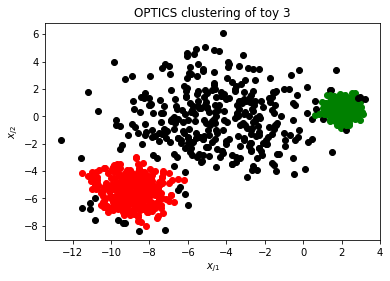

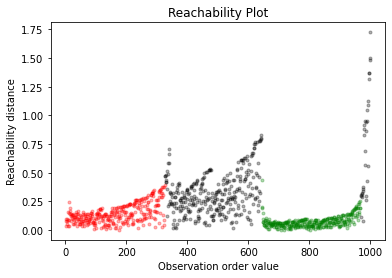

In [ ]:
toy3optics = OPTICS(min_samples=2,xi=0.035,min_cluster_size=0.2).fit(toy3)
toy3opticspredicted = toy3optics.labels_
print(np.unique(toy3optics.labels_))

c = 0
for i in indices:
    if toy3opticspredicted[i] == 0 and toy3_labels_true[i] == 0:
        c += 1
    if toy3opticspredicted[i] == 1 and toy3_labels_true[i] == 1:
        c += 1
    if toy3opticspredicted[i] == 2 and toy3_labels_true[i] == 2:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy3opticspredicted[i] == 0:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy3opticspredicted[i] == 1:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif toy3opticspredicted[i] == 2:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy3opticspredicted[i] == -1:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
plt.title('OPTICS clustering of toy 3')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/opticstoy3.png")
plt.show()

nooutlierstoy3 = []
nooutlierstoy3predicted = []
for i in range(len(toy3opticspredicted)):
  if toy3opticspredicted[i] != -1:
    nooutlierstoy3predicted.append(toy3opticspredicted[i])
    nooutlierstoy3.append(toy3[i])

toy3space = np.arange(len(toy1))
toy3reachability = toy3optics.reachability_[toy3optics.ordering_]
toy3labels = toy3optics.labels_[toy3optics.ordering_]

# Reachability plot
colors = ['r.', 'g.', 'b.']
for klass, color in zip(range(0, 3), colors):
    Xk = toy3space[toy3labels == klass]
    Rk = toy3reachability[toy3labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(toy3space[toy3labels == -1], toy3reachability[toy3labels == -1], 'k.', alpha=0.3)
#plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability distance')
plt.xlabel('Observation order value')
plt.title('Reachability Plot')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy3reachplot.png")

plt.show()

In [ ]:
print(sklearn.metrics.silhouette_score(nooutlierstoy3,nooutlierstoy3predicted))
print(sklearn.metrics.davies_bouldin_score(nooutlierstoy3,nooutlierstoy3predicted))
for i in range(len(toy3opticspredicted)):
  if toy3opticspredicted[i] == -1:
    toy3opticspredicted[i] = 3
print(purity_score(toy3_labels_true, toy3opticspredicted))
print(rand_index_score(toy3_labels_true.astype(np.int64),toy3opticspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy3_labels_true, toy3opticspredicted, average='weighted'))

0.705401285827985
0.44370617523400196
0.77
0.7636716716716717
0.7839387249799938


accuracy is 0.982
[[ 1.0672057  -0.06048534]
 [-0.06048534  1.01494199]]
[[ 0.22787993 -0.00044927]
 [-0.00044927  0.23207933]]
[[ 6.35933482 -0.16405891]
 [-0.16405891  4.52602435]]


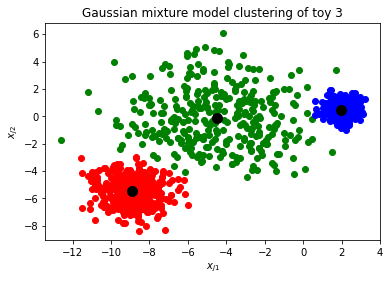

In [ ]:
toy3gmm = GaussianMixture(n_components=3, random_state=0).fit(toy3)
toy3gmmmeans = toy3gmm
toy3gmmpredicted = toy3gmm.predict(toy3)

c = 0
for i in indices:
    if toy3gmmpredicted[i] == 0 and toy3_labels_true[i] == 0:
        c += 1
    if toy3gmmpredicted[i] == 1 and toy3_labels_true[i] == 2:
        c += 1
    if toy3gmmpredicted[i] == 2 and toy3_labels_true[i] == 1:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy3gmmpredicted[i] == 0:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy3gmmpredicted[i] == 1:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy3gmmpredicted[i] == 2:
        plt.plot(toy3[i, 0],toy3[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
for i in range(len(toy3gmm.means_)):
  plt.plot(toy3gmm.means_[i][0],toy3gmm.means_[i][1], 'o',color='black',markersize=10)
  print(toy3gmm.covariances_[i])
plt.title('Gaussian mixture model clustering of toy 3')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/gmmtoy3.png")
plt.show()

for i in range(len(toy3gmmpredicted)):
  if toy3gmmpredicted[i] == 0:
    toy3gmmpredicted[i] = 0
  elif toy3gmmpredicted[i] == 1:
    toy3gmmpredicted[i] = 2
  elif toy3gmmpredicted[i] == 2:
    toy3gmmpredicted[i] = 1

In [ ]:
print(sklearn.metrics.silhouette_score(toy3,toy3gmmpredicted))
print(sklearn.metrics.davies_bouldin_score(toy3,toy3gmmpredicted))

print(purity_score(toy3_labels_true, toy3gmmpredicted))
print(rand_index_score(toy3_labels_true.astype(np.int64),toy3gmmpredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy3_labels_true, toy3gmmpredicted, average='weighted'))

0.6216767288713454
0.5842498285815768
0.982
0.9764684684684685
0.9819617330409431


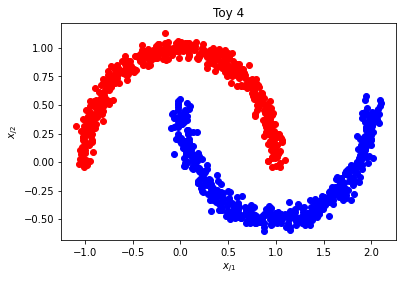

In [ ]:
toy4, toy4_labels_true = datasets.make_moons(n_samples=1000, noise=.05)
for i in indices:
    if toy4_labels_true[i] == 0:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy4_labels_true[i] == 1:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
plt.title('Toy 4')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy4.png")
plt.show()

accuracy is 0.748


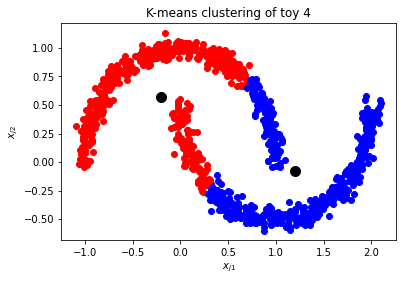

'\nfor i in range(len(toy4kmeanspredicted)):\n  if toy4kmeanspredicted[i] == 0:\n    toy4kmeanspredicted[i] = 3\n  elif toy4kmeanspredicted[i] == 1:\n    toy4kmeanspredicted[i] = 0\n  elif toy4kmeanspredicted[i] == 3:\n    toy4kmeanspredicted[i] = 1\n'

In [ ]:
toy4kmeans = KMeans(n_clusters=2, random_state=0).fit(toy4)
toy4kmeanspredicted = toy4kmeans.labels_

c = 0
for i in indices:
    if toy4kmeanspredicted[i] == 0 and toy4_labels_true[i] == 0:
        c += 1
    if toy4kmeanspredicted[i] == 1 and toy4_labels_true[i] == 1:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy4kmeanspredicted[i] == 0:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy4kmeanspredicted[i] == 1:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
for i in range(len(toy4kmeans.cluster_centers_)):
  plt.plot(toy4kmeans.cluster_centers_[i][0],toy4kmeans.cluster_centers_[i][1], 'o',color='black',markersize=10)
plt.title('K-means clustering of toy 4')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeanstoy4.png")
plt.show()
'''
for i in range(len(toy4kmeanspredicted)):
  if toy4kmeanspredicted[i] == 0:
    toy4kmeanspredicted[i] = 3
  elif toy4kmeanspredicted[i] == 1:
    toy4kmeanspredicted[i] = 0
  elif toy4kmeanspredicted[i] == 3:
    toy4kmeanspredicted[i] = 1
'''

In [ ]:
print(sklearn.metrics.silhouette_score(toy4,toy4kmeanspredicted))
print(sklearn.metrics.davies_bouldin_score(toy4,toy4kmeanspredicted))

print(purity_score(toy4_labels_true, toy4kmeanspredicted))
print(rand_index_score(toy4_labels_true.astype(np.int64),toy4kmeanspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy4_labels_true, toy4kmeanspredicted, average='weighted'))

0.4887787144430159
0.7819770432045877
0.748
0.6226306306306306
0.748


[0 1]
accuracy is 0.0


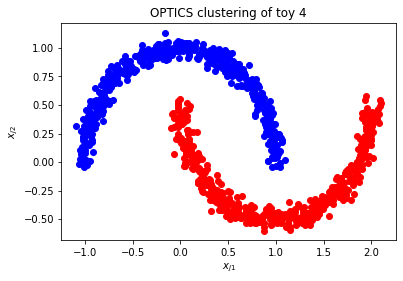

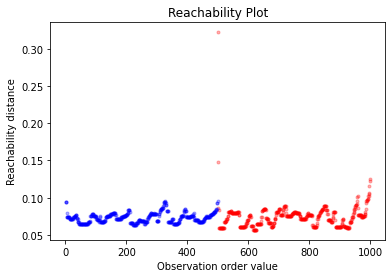

In [ ]:
toy4optics = OPTICS(min_samples=19,xi=0.1,min_cluster_size=0.1).fit(toy4)
toy4opticspredicted = toy4optics.labels_
print(np.unique(toy4optics.labels_))

c = 0
for i in indices:
    if toy4opticspredicted[i] == 0 and toy4_labels_true[i] == 1:
        c += 1
    if toy4opticspredicted[i] == 1 and toy4_labels_true[i] == 0:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy4opticspredicted[i] == 0:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy4opticspredicted[i] == 1:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif toy4opticspredicted[i] == -1:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))

plt.title('OPTICS clustering of toy 4')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/opticstoy4.png")
plt.show()

for i in range(len(toy4opticspredicted)):
  if toy4opticspredicted[i] == 0:
    toy4opticspredicted[i] = 1
  elif toy4opticspredicted[i] == 1:
    toy4opticspredicted[i] = 0

toy4space = np.arange(len(toy4))
toy4reachability = toy4optics.reachability_[toy4optics.ordering_]
toy4labels = toy4optics.labels_[toy4optics.ordering_]

# Reachability plot
colors = ['r.', 'b.']
for klass, color in zip(range(0, 3), colors):
    Xk = toy4space[toy4labels == klass]
    Rk = toy4reachability[toy4labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(toy4space[toy4labels == -1], toy4reachability[toy4labels == -1], 'k.', alpha=0.3)
#plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability distance')
plt.xlabel('Observation order value')
plt.title('Reachability Plot')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toy4reachplot.png")

plt.show()

In [ ]:
print(sklearn.metrics.silhouette_score(toy4,toy4opticspredicted))
print(sklearn.metrics.davies_bouldin_score(toy4,toy4opticspredicted))
for i in range(len(toy4opticspredicted)):
  if toy4opticspredicted[i] == -1:
    toy4opticspredicted[i] = 3
print(purity_score(toy4_labels_true, toy4opticspredicted))
print(rand_index_score(toy4_labels_true.astype(np.int64),toy4opticspredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy4_labels_true, toy4opticspredicted, average='weighted'))

0.2510614285220846
1.127223585766532
1.0
0.8575195195195195
0.17355371900826447


accuracy is 0.146
[[0.35821126 0.05189501]
 [0.05189501 0.09543194]]
[[0.35391445 0.05444814]
 [0.05444814 0.0965945 ]]


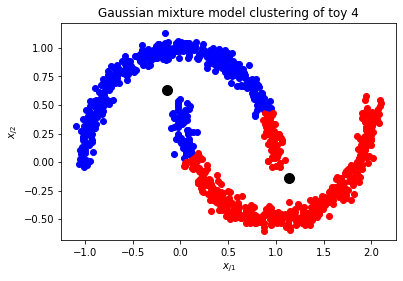

In [ ]:
toy4gmm = GaussianMixture(n_components=2, random_state=0).fit(toy4)
toy4gmmmeans = toy4gmm
toy4gmmpredicted = toy4gmm.predict(toy4)

c = 0
for i in indices:
    if toy4gmmpredicted[i] == 0 and toy4_labels_true[i] == 1:
        c += 1
    if toy4gmmpredicted[i] == 1 and toy4_labels_true[i] == 0:
        c += 1
print('accuracy is',c/1000)

for i in indices:
    if toy4gmmpredicted[i] == 0:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
    elif toy4gmmpredicted[i] == 1:
        plt.plot(toy4[i, 0],toy4[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
for i in range(len(toy4gmm.means_)):
  plt.plot(toy4gmm.means_[i][0],toy4gmm.means_[i][1], 'o',color='black',markersize=10)
  print(toy4gmm.covariances_[i])
plt.title('Gaussian mixture model clustering of toy 4')
plt.xlabel('$x_{j1}$')
plt.ylabel('$x_{j2}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/gmmtoy4.png")
plt.show()

for i in range(len(toy4gmmpredicted)):
  if toy4gmmpredicted[i] == 0:
    toy4gmmpredicted[i] = 1
  elif toy4gmmpredicted[i] == 1:
    toy4gmmpredicted[i] = 0

In [ ]:
print(sklearn.metrics.silhouette_score(toy4,toy4gmmpredicted))
print(sklearn.metrics.davies_bouldin_score(toy4,toy4gmmpredicted))

print(purity_score(toy4_labels_true, toy4gmmpredicted))
print(rand_index_score(toy4_labels_true.astype(np.int64),toy4gmmpredicted.astype(np.int64)))
print(sklearn.metrics.f1_score(toy4_labels_true, toy4gmmpredicted, average='weighted'))

0.4670745350719012
0.827467623999159
0.854
0.7503823823823824
0.146


# K-Means

### Sklearn implementation

In [ ]:
sklearnkmeans = KMeans(n_clusters=10, random_state=0).fit(PCA_x)
predicted = sklearnkmeans.labels_

In [ ]:
print(sklearn.metrics.silhouette_score(x,predicted))
print(sklearn.metrics.davies_bouldin_score(x,predicted))
#Purity
kmeansclustering = [[],[],[],[],[],[],[],[],[],[]]
for i in range(n):
    kmeansclustering[predicted[i]].append(i)
kmeansallactuallabels = []
kmeansclusterlabels = []
for i in range(k):
    kmeansactuallabels = []
    for j in range(len(kmeansclustering[i])):
        kmeansactuallabels.append(y[kmeansclustering[i][j]])
    kmeansallactuallabels.append(kmeansactuallabels)
    kmeansclusterlabels.append(statistics.mode(kmeansactuallabels))
print(sum([kmeansallactuallabels[i].count(kmeansclusterlabels[i]) for i in range(k)])/n)
#print(sklearn.metrics.adjusted_rand_score(y,bestnewlabels))
from scipy.special import comb
from itertools import combinations
import numpy as np

def rand_index_score(clusters, classes):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

y = y.astype(np.int64)
predicted = predicted.astype(np.int64)
print(rand_index_score(y,predicted))

0.08343531729187934
2.560482817952666
0.579
0.8702302302302303


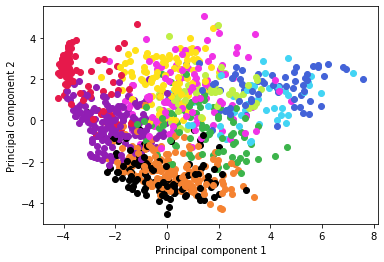

In [ ]:
indices = [i for i in range(1000)]
for i in indices:
    if predicted[i] == 0:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
    elif predicted[i] == 1:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#f032e6'),markeredgecolor=('#f032e6'))
    elif predicted[i] == 2:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#911eb4'),markeredgecolor=('#911eb4'))
    elif predicted[i] == 3:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#4363d8'),markeredgecolor=('#4363d8'))
    elif predicted[i] == 4:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#42d4f4'),markeredgecolor=('#42d4f4'))
    elif predicted[i] == 5:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#3cb44b'),markeredgecolor=('#3cb44b'))
    elif predicted[i] == 6:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#bfef45'),markeredgecolor=('#bfef45'))
    elif predicted[i] == 7:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#ffe119'),markeredgecolor=('#ffe119'))
    elif predicted[i] == 8:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#f58231'),markeredgecolor=('#f58231'))
    elif predicted[i] == 9:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#e6194B'),markeredgecolor=('#e6194B'))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
#plt.savefig('mnistkmeans.png')
plt.show()

### Manual implementation

In [ ]:
import random
import numpy as np
import statistics

def kmeans(k,x,y,N):
    n = len(x)
    acc = 0
    for q in range(N):
        centroids = [round(random.random()*(n-1)) for i in range(k)] #Randomly pick k points as initial centroids
        for i in range(n):
          plt.plot(x[i, 0],x[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
        plt.plot(x[centroids[0]][0],x[centroids[0]][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(x[centroids[1]][0],x[centroids[1]][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(x[centroids[2]][0],x[centroids[2]][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Iteration 1, Step 1')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansinitcentroids.png")
        plt.show()
        clustering = [[] for i in range(k)] #Each row represents one cluster
        for i in range(n):
            dist = [np.linalg.norm(x[i]-x[j]) for j in centroids] #For each point calculate distance to each centroid
            clustering[dist.index(min(dist))].append(i) #Assign point to nearest centroid
        colors = ['g','y','r']
        for i in range(k):
          for j in range(len(clustering[i])):
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
        plt.plot(x[centroids[0]][0],x[centroids[0]][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(x[centroids[1]][0],x[centroids[1]][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(x[centroids[2]][0],x[centroids[2]][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Iteration 1, Step 3')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansassign1.png")
        plt.show()
        print(sum([distortion(x,r) for r in clustering]))
        centroids = []
        for i in range(k):
            clustermatrix = []
            for j in range(len(clustering[i])):
                clustermatrix.append(x[clustering[i][j]])#Create matrix of clustering with each row representing one cluster
            clustermatrix = np.matrix(clustermatrix)
            centroids.append(np.array(clustermatrix.mean(0)))#Update the centroids as the mean of the points in each cluster
        for i in range(k):
          for j in range(len(clustering[i])):
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
        plt.plot(centroids[0][0][0],centroids[0][0][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(centroids[1][0][0],centroids[1][0][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(centroids[2][0][0],centroids[2][0][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Iteration 1, Step 4')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansupdatecentroids.png")
        plt.show()
        print(sum([distortion(x,r) for r in clustering]))
        newclustering = [[] for i in range(k)]#Repeat until the clustering no longer changes
        s = 2
        while 1 > 0:
            newclustering = [[] for i in range(k)]
            for i in range(n):
                dist = [np.linalg.norm(x[i]-j) for j in centroids]
                newclustering[dist.index(min(dist))].append(i)
            if clustering == newclustering:
                break
            else:
                clustering = newclustering
            centroids = []
            for i in range(k):
                clustermatrix = []
                for j in range(len(clustering[i])):
                    clustermatrix.append(x[clustering[i][j]])
                clustermatrix = np.matrix(clustermatrix)
                centroids.append(np.array(clustermatrix.mean(0)))
            for i in range(k):
              for j in range(len(clustering[i])):
                plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
                plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
                plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(centroids[0][0][0],centroids[0][0][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
            plt.plot(centroids[1][0][0],centroids[1][0][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
            plt.plot(centroids[2][0][0],centroids[2][0][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
            plt.title('Iteration '+str(s)+', Steps 3 and 4 combined')
            plt.xlabel('$x_{j1}$')
            plt.ylabel('$x_{j2}$')
            images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
            plt.savefig(f"{images_dir}/toykmeansassign"+str(s)+".png")
            plt.show()
            print(sum([distortion(x,r) for r in newclustering]))
            s += 1
        for i in range(k):
          for j in range(len(clustering[i])):
            plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
        plt.plot(centroids[0][0][0],centroids[0][0][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(centroids[1][0][0],centroids[1][0][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(centroids[2][0][0],centroids[2][0][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Final Results')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansfinal.png")
        plt.show()
        allactuallabels = []
        clusterlabels = []
        for i in range(k):
            actuallabels = []
            for j in range(len(newclustering[i])):
                actuallabels.append(y[newclustering[i][j]])
            allactuallabels.append(actuallabels)
            clusterlabels.append(statistics.mode(actuallabels))#Determine which cluster pertains to each label
        
        newlabels = np.zeros(n)
        for i in range(k):
            for j in range(len(newclustering[i])):
                newlabels[newclustering[i][j]] = clusterlabels[i]#Create list of size n with new labels labels

        c = 0
        for i in range(n):
            if newlabels[i] == y[i]:
                c += 1
        #print("Accuracy is",c/n)#Compare list of new labels to the true labels
        if c/n > acc:
            global bestnewclustering
            bestnewclustering = newclustering
            global bestallactuallabels
            bestallactuallabels = allactuallabels
            global bestclusterlabels
            bestclusterlabels = clusterlabels
            global bestnewlabels
            bestnewlabels = newlabels
            global bestcentroids
            bestcentroids = centroids
            acc = c/n
    print(acc)
    return

def distortion(x,r):
  xs = [x[i] for i in r]
  print(xs)
  return sum([np.linalg.norm(xs[i]-np.mean(xs))**2 for i in range(len(xs))])

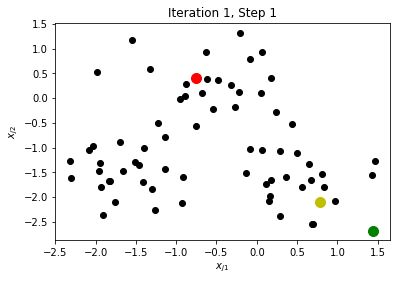

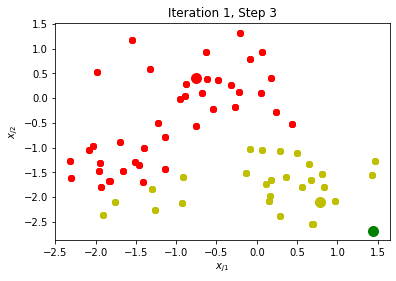

[array([ 1.44157535, -2.67387953])]
[array([-0.1352425 , -1.51530165]), array([ 1.43377948, -1.54697767]), array([ 0.78829541, -2.10414938]), array([-1.26716878, -2.26812184]), array([-1.75540257, -2.09031609]), array([ 0.29319051, -2.37372741]), array([ 0.11504196, -1.7303754 ]), array([-1.90657314, -2.3631413 ]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.64911909, -1.33680705]), array([ 0.36599831, -1.5987718 ]), array([-0.0865617 , -1.02818941]), array([-0.91061021, -1.58996242]), array([ 0.15271607, -2.07481727]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 0.6781832 , -1.64671342]), array([ 0.06938716, -1.04496752]), array([-1.29882918, -1.84240505]), array([ 0.28242322, -1.07536814]), array([ 0.56345605, -1.79900532]), array([ 0.50525001, -1.10706475]), array([-0.93029966

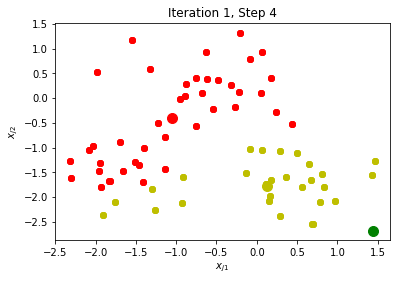

[array([ 1.44157535, -2.67387953])]
[array([-0.1352425 , -1.51530165]), array([ 1.43377948, -1.54697767]), array([ 0.78829541, -2.10414938]), array([-1.26716878, -2.26812184]), array([-1.75540257, -2.09031609]), array([ 0.29319051, -2.37372741]), array([ 0.11504196, -1.7303754 ]), array([-1.90657314, -2.3631413 ]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.64911909, -1.33680705]), array([ 0.36599831, -1.5987718 ]), array([-0.0865617 , -1.02818941]), array([-0.91061021, -1.58996242]), array([ 0.15271607, -2.07481727]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 0.6781832 , -1.64671342]), array([ 0.06938716, -1.04496752]), array([-1.29882918, -1.84240505]), array([ 0.28242322, -1.07536814]), array([ 0.56345605, -1.79900532]), array([ 0.50525001, -1.10706475]), array([-0.93029966

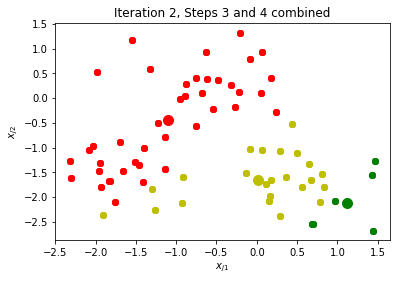

[array([ 1.43377948, -1.54697767]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 1.44157535, -2.67387953])]
[array([-0.1352425 , -1.51530165]), array([ 0.78829541, -2.10414938]), array([-1.26716878, -2.26812184]), array([ 0.29319051, -2.37372741]), array([ 0.11504196, -1.7303754 ]), array([-1.90657314, -2.3631413 ]), array([ 0.64911909, -1.33680705]), array([ 0.36599831, -1.5987718 ]), array([-0.0865617 , -1.02818941]), array([-0.91061021, -1.58996242]), array([ 0.15271607, -2.07481727]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 0.6781832 , -1.64671342]), array([ 0.06938716, -1.04496752]), array([ 0.43487731, -0.52718284]), array([-1.29882918, -1.84240505]), array([ 0.28242322, -1.07536814]), array([ 0.56345605, -1.79900532]), array([ 0.50525001, -1.10706475]), array([-0.93029966

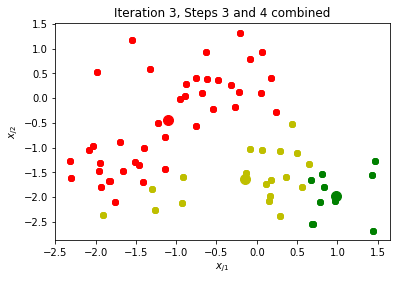

[array([ 1.43377948, -1.54697767]), array([ 0.78829541, -2.10414938]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 1.44157535, -2.67387953]), array([ 0.6781832 , -1.64671342])]
[array([-0.1352425 , -1.51530165]), array([-1.26716878, -2.26812184]), array([ 0.29319051, -2.37372741]), array([ 0.11504196, -1.7303754 ]), array([-1.90657314, -2.3631413 ]), array([ 0.64911909, -1.33680705]), array([ 0.36599831, -1.5987718 ]), array([-0.0865617 , -1.02818941]), array([-0.91061021, -1.58996242]), array([ 0.15271607, -2.07481727]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.06938716, -1.04496752]), array([ 0.43487731, -0.52718284]), array([-1.29882918, -1.84240505]), array([ 0.28242322, -1.07536814]), array([ 0.56345605, -1.79900532]), array([ 0.50525001, -1.10706475]), array([-0.93029966

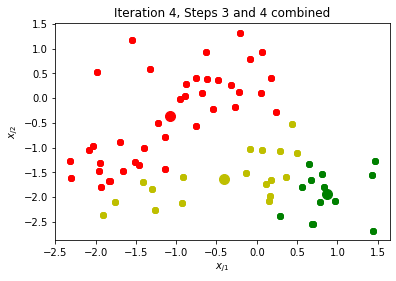

[array([ 1.43377948, -1.54697767]), array([ 0.78829541, -2.10414938]), array([ 0.29319051, -2.37372741]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.64911909, -1.33680705]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 1.44157535, -2.67387953]), array([ 0.6781832 , -1.64671342]), array([ 0.56345605, -1.79900532])]
[array([-0.1352425 , -1.51530165]), array([-1.26716878, -2.26812184]), array([-1.75540257, -2.09031609]), array([ 0.11504196, -1.7303754 ]), array([-1.90657314, -2.3631413 ]), array([ 0.36599831, -1.5987718 ]), array([-0.0865617 , -1.02818941]), array([-0.91061021, -1.58996242]), array([ 0.15271607, -2.07481727]), array([-1.41128693, -1.70089047]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.06938716, -1.04496752]), array([ 0.43487731, -0.52718284]), array([-1.29882918, -1.84240505]), array([ 0.28242322

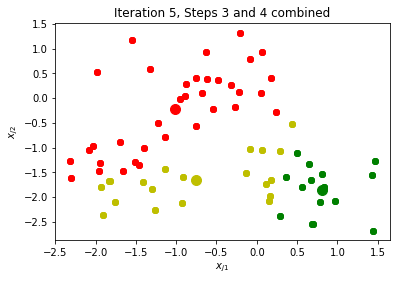

[array([ 1.43377948, -1.54697767]), array([ 0.78829541, -2.10414938]), array([ 0.29319051, -2.37372741]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.64911909, -1.33680705]), array([ 0.36599831, -1.5987718 ]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 1.44157535, -2.67387953]), array([ 0.6781832 , -1.64671342]), array([ 0.56345605, -1.79900532]), array([ 0.50525001, -1.10706475])]
[array([-0.1352425 , -1.51530165]), array([-1.26716878, -2.26812184]), array([-1.75540257, -2.09031609]), array([ 0.11504196, -1.7303754 ]), array([-1.90657314, -2.3631413 ]), array([-0.0865617 , -1.02818941]), array([-0.91061021, -1.58996242]), array([-1.93539857, -1.78942483]), array([ 0.15271607, -2.07481727]), array([-1.41128693, -1.70089047]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.06938716, -1.04496752]), array([ 0.43487731

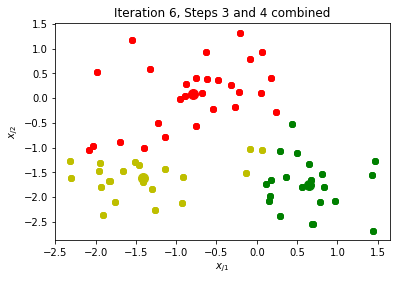

[array([ 1.43377948, -1.54697767]), array([ 0.78829541, -2.10414938]), array([ 0.29319051, -2.37372741]), array([ 0.11504196, -1.7303754 ]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.64911909, -1.33680705]), array([ 0.36599831, -1.5987718 ]), array([ 0.15271607, -2.07481727]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 1.44157535, -2.67387953]), array([ 0.6781832 , -1.64671342]), array([ 0.43487731, -0.52718284]), array([ 0.28242322, -1.07536814]), array([ 0.56345605, -1.79900532]), array([ 0.50525001, -1.10706475])]
[array([-0.1352425 , -1.51530165]), array([-1.26716878, -2.26812184]), array([-1.75540257, -2.09031609]), array([-1.90657314, -2.3631413 ]), array([-2.30694892, -1.60637014]), array([-0.0865617 , -1.02818941]), array([-0.91061021, -1.58996242]), array([-1.93539857

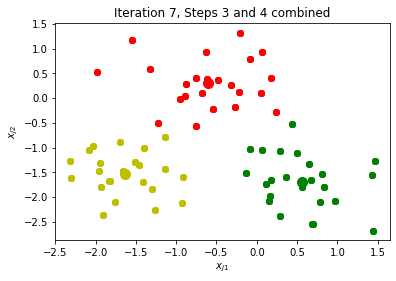

[array([-0.1352425 , -1.51530165]), array([ 1.43377948, -1.54697767]), array([ 0.78829541, -2.10414938]), array([ 0.29319051, -2.37372741]), array([ 0.11504196, -1.7303754 ]), array([ 0.69800336, -2.54653075]), array([ 1.46147101, -1.2597426 ]), array([ 0.64911909, -1.33680705]), array([ 0.36599831, -1.5987718 ]), array([-0.0865617 , -1.02818941]), array([ 0.15271607, -2.07481727]), array([ 0.16283367, -1.98408472]), array([ 0.18207696, -1.66178335]), array([ 0.97362598, -2.07750505]), array([ 0.68821277, -2.5497004 ]), array([ 0.80703969, -1.53889666]), array([ 0.83614738, -1.79626908]), array([ 1.44157535, -2.67387953]), array([ 0.6781832 , -1.64671342]), array([ 0.06938716, -1.04496752]), array([ 0.43487731, -0.52718284]), array([ 0.28242322, -1.07536814]), array([ 0.56345605, -1.79900532]), array([ 0.50525001, -1.10706475])]
[array([-1.26716878, -2.26812184]), array([-1.75540257, -2.09031609]), array([-1.90657314, -2.3631413 ]), array([-2.30694892, -1.60637014]), array([-1.39586251

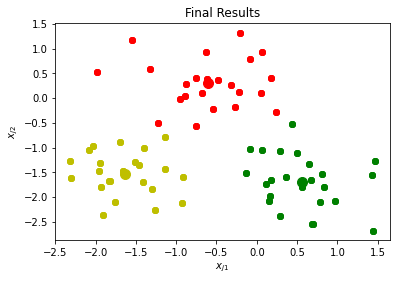

0.9571428571428572


In [ ]:
kmeans(3,toykmeans,toykmeans_labels_true,1)

In [ ]:
import random
import numpy as np
import statistics

def kmeans2(k,x,y,N):
    n = len(x)
    acc = 0
    for q in range(N):
        centroids = [round(random.random()*(n-1)) for i in range(k)] #Randomly pick k points as initial centroids
        '''
        for i in range(n):
          plt.plot(x[i, 0],x[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
        plt.plot(x[centroids[0]][0],x[centroids[0]][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(x[centroids[1]][0],x[centroids[1]][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(x[centroids[2]][0],x[centroids[2]][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Iteration 1, Step 1')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansinitcentroids.png")
        plt.show()
        '''
        clustering = [[] for i in range(k)] #Each row represents one cluster
        for i in range(n):
            dist = [np.linalg.norm(x[i]-x[j]) for j in centroids] #For each point calculate distance to each centroid
            clustering[dist.index(min(dist))].append(i) #Assign point to nearest centroid
        '''
        colors = ['g','y','r']
        for i in range(k):
          for j in range(len(clustering[i])):
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
        plt.plot(x[centroids[0]][0],x[centroids[0]][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(x[centroids[1]][0],x[centroids[1]][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(x[centroids[2]][0],x[centroids[2]][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Iteration 1, Step 3')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansassign1.png")
        plt.show()
        '''
        #print(sum([distortion(x,r) for r in clustering]))
        centroids = []
        for i in range(k):
            clustermatrix = []
            for j in range(len(clustering[i])):
                clustermatrix.append(x[clustering[i][j]])#Create matrix of clustering with each row representing one cluster
            clustermatrix = np.matrix(clustermatrix)
            centroids.append(np.array(clustermatrix.mean(0)))#Update the centroids as the mean of the points in each cluster
        '''
        for i in range(k):
          for j in range(len(clustering[i])):
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[clustering[i][j]][0],x[clustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
        plt.plot(centroids[0][0][0],centroids[0][0][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(centroids[1][0][0],centroids[1][0][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(centroids[2][0][0],centroids[2][0][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Iteration 1, Step 4')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansupdatecentroids.png")
        plt.show()
        '''
        #print(sum([distortion(x,r) for r in clustering]))
        newclustering = [[] for i in range(k)]#Repeat until the clustering no longer changes
        s = 2
        while 1 > 0:
            newclustering = [[] for i in range(k)]
            for i in range(n):
                dist = [np.linalg.norm(x[i]-j) for j in centroids]
                newclustering[dist.index(min(dist))].append(i)
            if clustering == newclustering:
                break
            else:
                clustering = newclustering
            centroids = []
            for i in range(k):
                clustermatrix = []
                for j in range(len(clustering[i])):
                    clustermatrix.append(x[clustering[i][j]])
                clustermatrix = np.matrix(clustermatrix)
                centroids.append(np.array(clustermatrix.mean(0)))
            '''
            for i in range(k):
              for j in range(len(clustering[i])):
                plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
                plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
                plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(centroids[0][0][0],centroids[0][0][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
            plt.plot(centroids[1][0][0],centroids[1][0][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
            plt.plot(centroids[2][0][0],centroids[2][0][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
            plt.title('Iteration '+str(s)+', Steps 3 and 4 combined')
            plt.xlabel('$x_{j1}$')
            plt.ylabel('$x_{j2}$')
            images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
            plt.savefig(f"{images_dir}/toykmeansassign"+str(s)+".png")
            plt.show()
            '''
            #print(sum([distortion(x,r) for r in newclustering]))
            s += 1
        '''
        for i in range(k):
          for j in range(len(clustering[i])):
            plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
            plt.plot(x[newclustering[i][j]][0],x[newclustering[i][j]][1],'o',markerfacecolor=colors[i],markeredgecolor=colors[i])
        plt.plot(centroids[0][0][0],centroids[0][0][1],'o',markerfacecolor='g',markeredgecolor='g',markersize=10)
        plt.plot(centroids[1][0][0],centroids[1][0][1],'o',markerfacecolor='y',markeredgecolor='y',markersize=10)
        plt.plot(centroids[2][0][0],centroids[2][0][1],'o',markerfacecolor='r',markeredgecolor='r',markersize=10)
        plt.title('Final Results')
        plt.xlabel('$x_{j1}$')
        plt.ylabel('$x_{j2}$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/toykmeansfinal.png")
        plt.show()
        '''
        allactuallabels = []
        clusterlabels = []
        for i in range(k):
            actuallabels = []
            for j in range(len(newclustering[i])):
                actuallabels.append(y[newclustering[i][j]])
            allactuallabels.append(actuallabels)
            clusterlabels.append(statistics.mode(actuallabels))#Determine which cluster pertains to each label
        
        newlabels = np.zeros(n)
        for i in range(k):
            for j in range(len(newclustering[i])):
                newlabels[newclustering[i][j]] = clusterlabels[i]#Create list of size n with new labels labels

        c = 0
        for i in range(n):
            if newlabels[i] == y[i]:
                c += 1
        #print("Accuracy is",c/n)#Compare list of new labels to the true labels
        if c/n > acc:
            global bestnewclustering
            bestnewclustering = newclustering
            global bestallactuallabels
            bestallactuallabels = allactuallabels
            global bestclusterlabels
            bestclusterlabels = clusterlabels
            global bestnewlabels
            bestnewlabels = newlabels
            global bestcentroids
            bestcentroids = centroids
            acc = c/n
    print(acc)
    return

In [ ]:
pca = PCA(n_components=75)
pca.fit(x)
PCA_x = PCA(n_components=75).fit_transform(x)
print(sum(pca.explained_variance_ratio_))

kmeans2(10,PCA_x,y,5)

0.8991479502562488
0.553


In [ ]:
print(sklearn.metrics.silhouette_score(PCA_x,bestnewlabels))
print(sklearn.metrics.davies_bouldin_score(PCA_x,bestnewlabels))

print(purity_score(y, bestnewlabels))
print(rand_index_score(y.astype(np.int64),bestnewlabels.astype(np.int64)))
print(sklearn.metrics.f1_score(y, bestnewlabels, average='weighted'))


0.08753171223650695
2.636681021700105
0.579
0.8708388388388388
0.5188544648928725


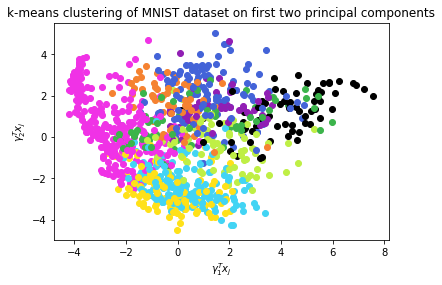

In [ ]:
indices = [i for i in range(1000)]
for i in indices:
    if bestnewlabels[i] == 0:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
    elif bestnewlabels[i] == 1:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#f032e6'),markeredgecolor=('#f032e6'))
    elif bestnewlabels[i] == 2:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#911eb4'),markeredgecolor=('#911eb4'))
    elif bestnewlabels[i] == 3:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#4363d8'),markeredgecolor=('#4363d8'))
    elif bestnewlabels[i] == 4:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#42d4f4'),markeredgecolor=('#42d4f4'))
    elif bestnewlabels[i] == 5:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#3cb44b'),markeredgecolor=('#3cb44b'))
    elif bestnewlabels[i] == 6:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#bfef45'),markeredgecolor=('#bfef45'))
    elif bestnewlabels[i] == 7:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#ffe119'),markeredgecolor=('#ffe119'))
    elif bestnewlabels[i] == 8:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#f58231'),markeredgecolor=('#f58231'))
    elif bestnewlabels[i] == 9:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#e6194B'),markeredgecolor=('#e6194B'))

plt.title('k-means clustering of MNIST dataset on first two principal components')
plt.xlabel('$\gamma_1^Tx_{j}$')
plt.ylabel('$\gamma_2^Tx_{j}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeansmnist.png")


[-1.141976325671945, -0.6386059643321012, -1.7343062738569648, 0.14401957313292127, 0.028716840870362425, 0.9009695957476826, 0.6020923816358579, -0.4324483973140227, 0.020666502221771438, 0.4576082774072465, -0.6049933111212097, -0.2005155753844039, -0.9512508208930699, -0.49949251535088884, 0.560439948990661, 0.06265423709771172, -0.13263280977552835, -0.2529051996317708, -0.054232772420064704, 0.19429976356689854, 0.09674791766130736, -0.07754643796206379, 0.04832030275787893, -0.22388348368626826, -0.04297944787800114, 0.0011160881385895174, 0.14109745862999284, -0.06505711256957862, -0.04397874249057612, 0.18069186319629965, 0.10453971447605555, -0.02887479616964112, -0.04658412723632516, -0.10969989399356991, -0.02094530431873563, 0.05252233908864876, -0.08938128390651705, 0.02929484864259139, 0.04671388241596039, 0.040464321018167104, -0.05447687839362248, 0.002106876632720675, -0.047502235959814766, -0.06624888556435335, -0.029525259025822134, 0.01683850588246456, 0.05870082372

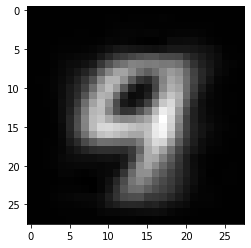

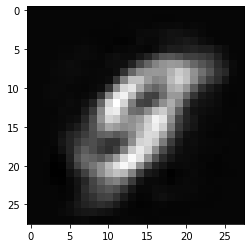

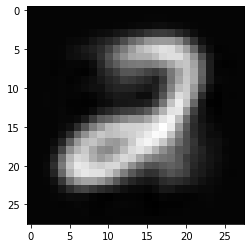

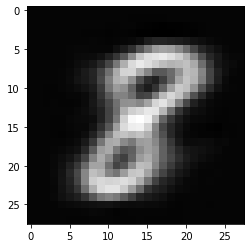

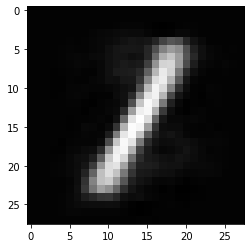

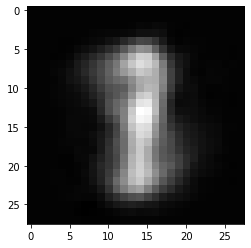

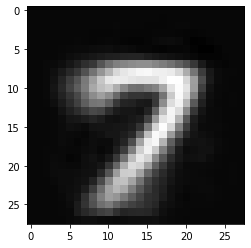

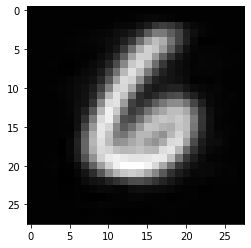

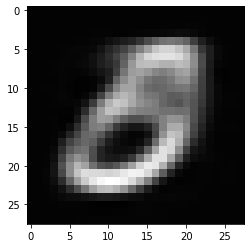

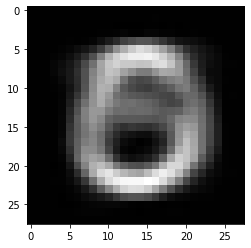

[4, 5, 2, 8, 1, 1, 7, 6, 0, 0] [9, 5, 2, 8, 1, '-', 7, 6, '-', 0]


In [ ]:
print(list(bestcentroids[1][0]))

for i in range(10):
    pixels = pca.inverse_transform(bestcentroids[i][0]).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
    plt.savefig(f"{images_dir}/mnistkmeanscentroid"+str(i)+".png")
    plt.show()
''' 
pixels = bestcentroids[0].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeansmnist.png")
plt.show()

pixels = bestcentroids[5].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeansmnist.png")
plt.show()

pixels = bestcentroids[8].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeansmnist.png")
plt.show()

pixels = bestcentroids[9].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeansmnist.png")
plt.show()

pixels = bestcentroids[3].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeansmnist.png")
plt.show()

pixels = bestcentroids[6].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/kmeansmnist.png")
plt.show()
'''
print(bestclusterlabels,
[9,5,2,8,1,'-',7,6,'-',0])

# PCA

In [ ]:
means = x.mean(0) #Column means
sds = np.std(x,axis=0) #Column Standard deviations
covmatrix = np.cov(np.transpose(x))

In [ ]:
from numpy.linalg import eig

eigenvalues,eigenvectors = eig(covmatrix)
def ordertest(A):
    return all(A[i] >= A[i+1] for i in range(len(A)-1))
eigenvalues = sorted(eigenvalues)
eigenvalues = list(reversed(eigenvalues))
eigenvectors = eigenvectors[np.argsort(eigenvalues)]

In [ ]:
sumeigs = sum(eigenvalues)
xvals = [i+1 for i in range(10)]
yvals = [eigenvalues[i-1]/sumeigs for i in xvals]
plt.plot(xvals,yvals)
plt.xlabel('Principal component number')
plt.ylabel('Proportion of variance explained')
plt.show()

In [ ]:
feature_vector = np.transpose(eigenvectors[:9])
manualPCA_x = np.matmul(np.transpose(feature_vector),np.transpose(x))

# Gaussian Mixture Model

In [1]:
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=75)
pca.fit(x)
PCA_x = PCA(n_components=75).fit_transform(x)
#print(sum(pca.explained_variance_ratio_))

gm = GaussianMixture(n_components=k, random_state=0).fit(PCA_x)
means = gm.means_
predicted = gm.predict(PCA_x)

NameError: ignored

In [ ]:
print(sklearn.metrics.silhouette_score(PCA_x,predicted))
print(sklearn.metrics.davies_bouldin_score(PCA_x,predicted))

print(purity_score(y, predicted))
print(rand_index_score(y.astype(np.int64),predicted.astype(np.int64)))
print(sklearn.metrics.f1_score(y, predicted, average='weighted'))

In [ ]:
indices = [i for i in range(1000)]
for i in indices:
    if predicted[i] == 0:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
    elif predicted[i] == 1:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#f032e6'),markeredgecolor=('#f032e6'))
    elif predicted[i] == 2:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#911eb4'),markeredgecolor=('#911eb4'))
    elif predicted[i] == 3:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#4363d8'),markeredgecolor=('#4363d8'))
    elif predicted[i] == 4:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#42d4f4'),markeredgecolor=('#42d4f4'))
    elif predicted[i] == 5:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#3cb44b'),markeredgecolor=('#3cb44b'))
    elif predicted[i] == 6:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#bfef45'),markeredgecolor=('#bfef45'))
    elif predicted[i] == 7:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#ffe119'),markeredgecolor=('#ffe119'))
    elif predicted[i] == 8:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#f58231'),markeredgecolor=('#f58231'))
    elif predicted[i] == 9:
        plt.plot(PCA_x[i, 0],PCA_x[i, 1],'o',markerfacecolor=('#e6194B'),markeredgecolor=('#e6194B'))
plt.title('GMM clustering of MNIST dataset on first two principal components')
plt.xlabel('$\gamma_1^Tx_{j}$')
plt.ylabel('$\gamma_2^Tx_{j}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/gmmmnist.png")

In [ ]:
for i in range(10):
    pixels = pca.inverse_transform(means[i]).reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
    plt.savefig(f"{images_dir}/mnistgmmcentroid"+str(i)+".png")
    plt.show()





'''for i in range(10):
    pixels = means[i].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
pixels = means[0].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig('gmmmnistcentroid8.png')
plt.show()

pixels = means[5].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig('gmmmnistcentroid2.png')
plt.show()

pixels = means[8].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig('gmmmnistcentroid3.png')
plt.show()

pixels = means[9].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig('gmmmnistcentroid6.png')
plt.show()

pixels = means[3].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig('gmmmnistcentroid1.png')
plt.show()

pixels = means[6].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.savefig('gmmmnistcentroid0.png')
plt.show()
'''


### Manual GMM

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal


# 0. Create dataset
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=420,centers=3)

c1,c2,c3 = [],[],[]
for er in range(len(Y)):
  if Y[er] == 0:
    c1.append(X[er])
  if Y[er] == 1:
    c2.append(X[er])
  if Y[er] == 2:
    c3.append(X[er])
print(len(c1),len(c2),len(c3))


print(np.unique(Y))

# Stretch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))


fig4 = plt.figure(figsize=(15,10))
ax4 = fig4.add_subplot(111) 
ax4.set_title('Data')
for i in range(400):
    ax4.plot(X[i, 0],X[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/toyGMMdata.png")
plt.show()


class GMM:

    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    

    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
           
                    
        """ 1. Set the initial mu, covariance and pi values"""
        kmeans = KMeans(n_clusters=3, random_state=0).fit(self.X)
        self.mu = kmeans.cluster_centers_
        '''
        labs = kmeans.labels_
        c1,c2,c3 = [],[],[]
        for er in range(len(labs)):
          if labs[er] == 0:
            c1.append(self.X[er])
          if labs[er] == 1:
            c2.append(self.X[er])
          if labs[er] == 2:
            c3.append(self.X[er])
        self.cov = [np.cov(np.transpose(c1)),np.cov(np.transpose(c2)),np.cov(np.transpose(c3))]
        '''
        #self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the diagonal  
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)
        print(self.mu,self.cov)

        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if
                             # if we have converged
            
        """Plot the initial state"""    
        #fig = plt.figure(figsize=(10,10))
        #ax0 = fig.add_subplot(111)
        #ax0.scatter(self.X[:,0],self.X[:,1])
        #ax0.set_title('Initial state')
        #for m,c in zip(self.mu,self.cov):
            #c += self.reg_cov
            #multi_normal = multivariate_normal(mean=m,cov=c)
            #ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            #ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        fig = plt.figure(figsize=(15,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1],color='black')
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='green',alpha=0.3)
            ax0.scatter(m[0],m[1],c='red',zorder=10,s=100)
        ax0.set_xlabel('$x_1$')
        ax0.set_ylabel('$x_2$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/GMMinitplot.png")
        plt.show()
        
        for i in range(self.iterations):               

            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))

            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)

            """
            The above calculation of r_ic is not that obvious why I want to quickly derive what we have done above.
            First of all the numerator:
            We calculate for each source c which is defined by m,co and p for every instance x_i, the multivariate_normal.pdf() value.
            For each loop this gives us a 100x1 matrix (This value divided by the denominator is then assigned to r_ic[:,r] which is in 
            the end a 100x3 matrix).
            Second the denominator:
            What we do here is, we calculate the multivariate_normal.pdf() for every instance x_i for every source c which is defined by
            pi_c, mu_c, and cov_c and write this into a list. This gives us a 3x100 matrix where we have 100 entrances per source c.
            Now the formula wants us to add up the pdf() values given by the 3 sources for each x_i. Hence we sum up this list over axis=0.
            This gives us then a list with 100 entries.
            What we have now is FOR EACH LOOP a list with 100 entries in the nominator and a list with 100 entries in the denominator
            where each element is the pdf per class c for each instance x_i (nominator) respectively the summed pdf's of classes c for each 
            instance x_i. Consequently we can now divide the nominator by the denominator and have as result a list with 100 elements which we
            can then assign to r_ic[:,r] --> One row r per source c. In the end after we have done this for all three sources (three loops)
            and run from r==0 to r==2 we get a matrix with dimensionallity 100x3 which is exactly what we want.
            If we check the entries of r_ic we see that there mostly one element which is much larger than the other two. This is because
            every instance x_i is much closer to one of the three gaussians (that is, much more likely to come from this gaussian) than
            it is to the other two. That is practically speaing, r_ic gives us the fraction of the probability that x_i belongs to class
            c over the probability that x_i belonges to any of the classes c (Probability that x_i occurs given the 3 Gaussians).
            """

            """M Step"""

            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)

                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic)) # Here np.sum(r_ic) gives as result the number of instances. This is logical since we know 
                                                # that the columns of each row of r_ic adds up to 1. Since we add up all elements, we sum up all
                                                # columns per row which gives 1 and then all rows which gives then the number of instances (rows) 
                                                # in X --> Since pi_new contains the fractions of datapoints, assigned to the sources c,
                                                # The elements in pi_new must add up to 1

            
            
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

            

            """
            This process of E step followed by a M step is now iterated a number of n times. In the second step for instance,
            we use the calculated pi_new, mu_new and cov_new to calculate the new r_ic which are then used in the second M step
            to calculat the mu_new2 and cov_new2 and so on....
            """

        #fig2 = plt.figure(figsize=(10,10))
        #ax1 = fig2.add_subplot(111) 
        #ax1.set_title('Log-Likelihood')
        #ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()

    
        fig2 = plt.figure(figsize=(15,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Log-likelihood')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/GMMlogplot.png")
        plt.show()


    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # Plot the point onto the fitted gaussians
        fig3 = plt.figure(figsize=(15,10))
        ax2 = fig3.add_subplot(111)
        #ax2.scatter(self.X[:,0],self.X[:,1],color='black')
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='green',alpha=0.3)
            ax2.scatter(m[0],m[1],c='red',zorder=10,s=100)
            ax2.set_title('Final state')
            #for y in Y:
                #plt.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        if prediction[0] > 0.33333:
          ax2.scatter(Y[0][0],Y[0][1],color='green')
        elif prediction[1] > 0.33333:
          ax2.scatter(Y[0][0],Y[0][1],color='red')
        elif prediction[2] > 0.33333:
          ax2.scatter(Y[0][0],Y[0][1],color='blue')
        return ax2
            

    def predict(self,Y):
        # Plot the point onto the fitted gaussian
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        return prediction
            
  
    def final(self):
        predictions = []
        for i in X:
          predictions.append(GMM.predict([i]))

        fig3 = plt.figure(figsize=(15,10))
        ax2 = fig3.add_subplot(111)
        for m,c in zip(self.mu,self.cov):
          multi_normal = multivariate_normal(mean=m,cov=c)
          ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='green',alpha=0.3)
          ax2.scatter(m[0],m[1],c='red',zorder=10,s=100)
        for i in range(len(predictions)):
          if predictions[i][0] > 0.33333:
            ax2.scatter(X[i][0],X[i][1],color='green')
          elif predictions[i][1] > 0.33333:
            ax2.scatter(X[i][0],X[i][1],color='red')
          elif predictions[i][2] > 0.33333:
            ax2.scatter(X[i][0],X[i][1],color='blue')
        ax2.set_title('Final state')
        ax2.set_xlabel('$x_1$')
        ax2.set_ylabel('$x_2$')
        images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
        plt.savefig(f"{images_dir}/GMMfinalplot.png")
        plt.show()


GMM = GMM(X,3,50)     
GMM.run()
GMM.final()

# OPTICS

In [ ]:
from sklearn.cluster import OPTICS

pca = PCA(n_components=10)
pca.fit(x)
PCA_x = PCA(n_components=10).fit_transform(x)
#print(sum(pca.explained_variance_ratio_))

optics = OPTICS(min_samples=17,metric='cosine',xi=0.05).fit(PCA_x)
predicted = optics.labels_

print(optics.get_params())
print(np.unique(optics.labels_))

opticsclustering = [[],[],[],[],[],[],[],[],[],[]]
for i in range(n):
    opticsclustering[predicted[i]].append(i)
opticsallactuallabels = []
opticsclusterlabels = []
for i in range(k):
    opticsactuallabels = []
    for j in range(len(opticsclustering[i])):
        opticsactuallabels.append(y[opticsclustering[i][j]])
    opticsallactuallabels.append(opticsactuallabels)
    opticsclusterlabels.append(statistics.mode(opticsactuallabels))
print(sum([opticsallactuallabels[i].count(opticsclusterlabels[i]) for i in range(k)])/n)

nooutliersPCA_x = []
nooutliersPCA_xpredicted = []
for i in range(len(optics.labels_)):
  if optics.labels_[i] != -1:
    nooutliersPCA_xpredicted.append(optics.labels_[i])
    nooutliersPCA_x.append(PCA_x[i])

print(sklearn.metrics.silhouette_score(nooutliersPCA_x,nooutliersPCA_xpredicted))
print(sklearn.metrics.davies_bouldin_score(nooutliersPCA_x,nooutliersPCA_xpredicted))

print(purity_score(y, optics.labels_))
'''
opticsrandlabels = optics.labels_[:]
for i in range(len(optics.labels_)):
  if optics.labels_[i] == -1:
    opticsrandlabels[i] = 10
print(rand_index_score(y.astype(np.int64),opticsrandlabels.astype(np.int64)))
print(sklearn.metrics.f1_score(y, opticsrandlabels, average='weighted'))
'''
counts = []
for i in range(-1,10):
  counts.append(list(predicted).count(i))
print(counts)
print(opticsclusterlabels)
#print(optics.labels_)

{'algorithm': 'auto', 'cluster_method': 'xi', 'eps': None, 'leaf_size': 30, 'max_eps': inf, 'metric': 'cosine', 'metric_params': None, 'min_cluster_size': None, 'min_samples': 17, 'n_jobs': None, 'p': 2, 'predecessor_correction': True, 'xi': 0.05}
[-1  0  1  2  3  4  5  6  7  8  9]
0.449
0.4539641915150678
0.855924671182436
0.492
[596, 32, 18, 53, 63, 58, 34, 26, 32, 45, 43]
[3, 3, 1, 1, 7, 0, 0, 6, 8, 4]


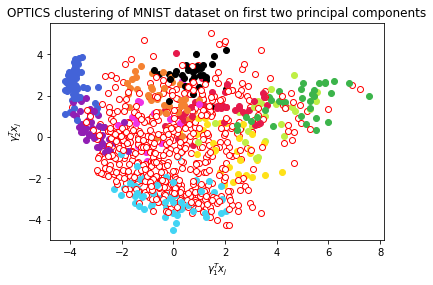

In [ ]:
PCA2_x = PCA(n_components=2).fit_transform(x)
indices = [i for i in range(1000)]
for i in indices:
    if predicted[i] == -1:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor='w',markeredgecolor='r')
    elif predicted[i] == 0:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#000000'),markeredgecolor=('#000000'))
    elif predicted[i] == 1:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#f032e6'),markeredgecolor=('#f032e6'))
    elif predicted[i] == 2:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#911eb4'),markeredgecolor=('#911eb4'))
    elif predicted[i] == 3:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#4363d8'),markeredgecolor=('#4363d8'))
    elif predicted[i] == 4:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#42d4f4'),markeredgecolor=('#42d4f4'))
    elif predicted[i] == 5:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#3cb44b'),markeredgecolor=('#3cb44b'))
    elif predicted[i] == 6:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#bfef45'),markeredgecolor=('#bfef45'))
    elif predicted[i] == 7:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#ffe119'),markeredgecolor=('#ffe119'))
    elif predicted[i] == 8:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#f58231'),markeredgecolor=('#f58231'))
    elif predicted[i] == 9:
        plt.plot(PCA2_x[i, 0],PCA2_x[i, 1],'o',markerfacecolor=('#e6194B'),markeredgecolor=('#e6194B'))

plt.title('OPTICS clustering of MNIST dataset on first two principal components')
plt.xlabel('$\gamma_1^Tx_{j}$')
plt.ylabel('$\gamma_2^Tx_{j}$')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/opticsmnist.png")

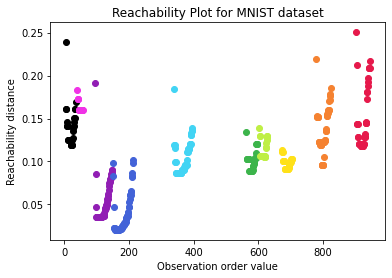

In [ ]:
mnistspace = np.arange(len(PCA_x))
mnistreachability = optics.reachability_[optics.ordering_]
mnistlabels = optics.labels_[optics.ordering_]

# Reachability plot
colors = ['#000000','#f032e6','#911eb4','#4363d8','#42d4f4','#3cb44b','#bfef45','#ffe119','#f58231','#e6194B']
for klass, color in zip(range(0, 11), colors):
    Xk = mnistspace[mnistlabels == klass]
    Rk = mnistreachability[mnistlabels== klass]
    plt.scatter(Xk, Rk, c=color, alpha=1)
#plt.scatter(mnistspace[optics.labels_ == -1], mnistreachability[optics.labels_ == -1], alpha=1)
#plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
#plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability distance')
plt.xlabel('Observation order value')
plt.title('Reachability Plot for MNIST dataset')
images_dir = '/content/gdrive/My Drive/Project_Stuff/Figures'
plt.savefig(f"{images_dir}/mnistreachplot.png")

plt.show()

In [ ]:
indices = [i for i in range(1000)]

poodle, poodle_labels_true = make_blobs(n_samples=1000, centers=[[0, 1.5], [-1.5, -1.5], [1.5, -1.5]], cluster_std=[[0.5,1],[5,5],[0.5,1]], random_state=0)
for i in indices:
    if poodle_labels_true[i] == 0:
        plt.plot(poodle[i, 0],poodle[i, 1],'o',markerfacecolor='r',markeredgecolor='r')
    elif poodle_labels_true[i] == 1:
        plt.plot(poodle[i, 0],poodle[i, 1],'o',markerfacecolor='g',markeredgecolor='g')
    elif poodle_labels_true[i] == 2:
        plt.plot(poodle[i, 0],poodle[i, 1],'o',markerfacecolor='b',markeredgecolor='b')
plt.show()